In [1]:
from halotools.sim_manager import CachedHaloCatalog, FakeSim
from halotools.empirical_models import PrebuiltHodModelFactory, Zheng07Cens, Zheng07Sats, TrivialPhaseSpace, NFWPhaseSpace, HodModelFactory
from halotools.mock_observables import return_xyz_formatted_array
import numpy as np
from Corrfunc.theory.wp import wp
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
cens_occ_model = Zheng07Cens(prim_haloprop_key = 'halo_vmax')
cens_prof_model = TrivialPhaseSpace()

sats_occ_model =  Zheng07Sats(prim_haloprop_key = 'halo_vmax')
sats_prof_model = NFWPhaseSpace()

In [4]:
cens_occ_model.param_dict['logMmin'] = 2.130
cens_occ_model.param_dict['sigma_logM'] = 0.1
sats_occ_model.param_dict['alpha'] = 2.75
sats_occ_model.param_dict['logM0'] = 2.04
sats_occ_model.param_dict['logM1'] = 2.34

In [5]:
model_instance = HodModelFactory(centrals_occupation = cens_occ_model, centrals_profile = cens_prof_model, 
                                 satellites_occupation = sats_occ_model, satellites_profile = sats_prof_model)

In [6]:
halocat = CachedHaloCatalog(simname='bolplanck',redshift = 0.0) 
model_instance.populate_mock(halocat) 
table = model_instance.mock.halo_table


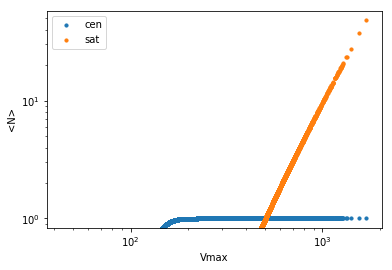

In [328]:
mean_ncen = cens_occ_model.mean_occupation(prim_haloprop = table['halo_vmax'])
mean_nsat = sats_occ_model.mean_occupation(prim_haloprop = table['halo_vmax'])

plt.scatter(table['halo_vmax'],mean_ncen,s=10,label = 'cen')
plt.scatter(table['halo_vmax'],mean_nsat,s=10,label = 'sat')
plt.legend()
plt.xlabel('Vmax')
plt.ylabel('<N>')
plt.xscale('log')
plt.yscale('log')

In [7]:
Npts = 1000
Lbox = 250.
nthreads = 1
#coords = np.vstack((model_instance.mock.galaxy_table['x'],model_instance.mock.galaxy_table['y'],model_instance.mock.galaxy_table['z'],)).T
pi_max = 60
pos = return_xyz_formatted_array(model_instance.mock.galaxy_table['x'], model_instance.mock.galaxy_table['y'], model_instance.mock.galaxy_table['z'])
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]
velz = model_instance.mock.galaxy_table['vz']
pos_zdist = return_xyz_formatted_array(x, y, z, velocity=velz, velocity_distortion_dimension='z')
x = pos_zdist[:,0]
y = pos_zdist[:,1]
z = pos_zdist[:,2]
coords = np.vstack((x,y,z)).T


In [1]:
#print(model_instance.mock.galaxy_table)
#print(model_instance.mock.halo_table)

In [14]:
z[np.where(z < 0.0)] = 0.0
z[np.where(z > 250.)] = 250.

In [18]:
#zbin_edge = np.genfromtxt('sdss_binfile.dat')
zbin_edge = np.array((0.13159712, 0.20840302, 0.33003624, 0.52265998, 0.82770744, 1.31079410, 2.07583147, 
                      3.28737848, 5.20603787, 8.24451170, 13.05637315, 20.67664966))
zxi_20 = [366.1, 264.3, 184.0, 128.6, 84.7,  59.4, 42.9, 30.9,  21.9, 14.6,  8.24]
zxi_20_err = np.sqrt([9.3,7.6,6.6,5.5,4.3,3.6,3.3,3.1,2.7,2.1,1.32])
#xi = wp(coords, zbin_edge, pi_max, period=Lbox)
xi = wp(Lbox,pi_max,nthreads,zbin_edge,x,y,z)

[(0.13159712, 0.20840302, 0., 430.02999878, 142786, 0.)
 (0.20840302, 0.33003624, 0., 300.40991211, 273708, 0.)]


In [19]:
print(xi['wp'])

[430.02999878 300.40991211 203.46643066 128.78997803  78.61540222
  49.15397644  33.19833755  23.6693573   16.36460876  10.60664177
   6.29167557]


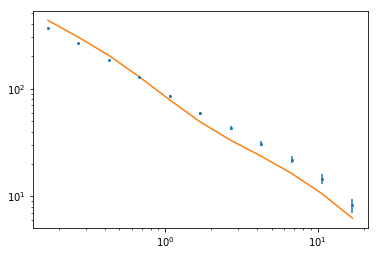

In [20]:
zbin_cen = (zbin_edge[1:]+zbin_edge[:-1])/2.
plt.errorbar(zbin_cen,zxi_20,yerr=zxi_20_err,fmt='o',markersize=2)
plt.plot(zbin_cen, xi['wp'])
plt.xscale('log')
plt.yscale('log')

In [269]:
mass_cens_occ_model = Zheng07Cens()
mass_cens_prof_model = TrivialPhaseSpace()

mass_sats_occ_model =  Zheng07Sats()
mass_sats_prof_model = NFWPhaseSpace()

mass_cens_occ_model.param_dict['logMmin'] = 11.96
mass_cens_occ_model.param_dict['sigma_logM'] = 0.38
mass_sats_occ_model.param_dict['alpha'] = 1.16
mass_sats_occ_model.param_dict['logM0'] = 11.3
mass_sats_occ_model.param_dict['logM1'] = 13.28

print(mass_cens_occ_model.param_dict)
print(mass_sats_occ_model.param_dict)
mass_model_instance = HodModelFactory(centrals_occupation = mass_cens_occ_model, centrals_profile = mass_cens_prof_model, 
                                 satellites_occupation = mass_sats_occ_model, satellites_profile = mass_sats_prof_model)

mass_halocat = CachedHaloCatalog(simname='bolplanck',redshift = 0.0) 
mass_model_instance.populate_mock(halocat) 
mass_table = mass_model_instance.mock.halo_table

pos = return_xyz_formatted_array(mass_model_instance.mock.galaxy_table['x'], mass_model_instance.mock.galaxy_table['y'],
                                 mass_model_instance.mock.galaxy_table['z'])
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]
velz = mass_model_instance.mock.galaxy_table['vz']
pos_zdist = return_xyz_formatted_array(x, y, z, velocity=velz, velocity_distortion_dimension='z')

zbin_edge = np.array((0.13159712, 0.20840302, 0.33003624, 0.52265998, 0.82770744, 1.31079410, 2.07583147, 
                      3.28737848, 5.20603787, 8.24451170, 13.05637315, 20.67664966))
mass_xi = wp(pos_zdist, zbin_edge, pi_max, period=Lbox)



{'logMmin': 11.96, 'sigma_logM': 0.38}
{'logM0': 11.3, 'logM1': 13.28, 'alpha': 1.16}


"cens_occ_model.param_dict['logMmin'] = 2.25\ncens_occ_model.param_dict['sigma_logM'] = 0.1\nsats_occ_model.param_dict['alpha'] = 3.0\nsats_occ_model.param_dict['logM0'] = 2.0\nsats_occ_model.param_dict['logM1'] = 2.5"

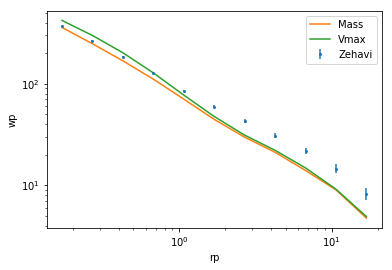

In [401]:
plt.errorbar(zbin_cen,zxi_20,yerr=zxi_20_err,fmt='o',markersize=2,label = 'Zehavi')
plt.plot(zbin_cen,mass_xi,label = 'Mass')
plt.plot(zbin_cen,xi,label = 'Vmax')
plt.legend()
plt.xlabel('rp')
plt.ylabel('wp')
plt.xscale('log')
plt.yscale('log')

"""cens_occ_model.param_dict['logMmin'] = 2.25
cens_occ_model.param_dict['sigma_logM'] = 0.1
sats_occ_model.param_dict['alpha'] = 3.0
sats_occ_model.param_dict['logM0'] = 2.0
sats_occ_model.param_dict['logM1'] = 2.5"""

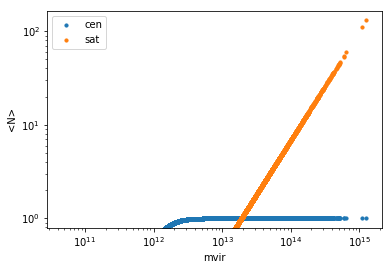

In [86]:
mean_ncen = cens_occ_model.mean_occupation(prim_haloprop = table['halo_vmax'])
mean_nsat = sats_occ_model.mean_occupation(prim_haloprop = table['halo_vmax'])

mass_mean_ncen = mass_cens_occ_model.mean_occupation(prim_haloprop = table['halo_mvir'])
mass_mean_nsat = mass_sats_occ_model.mean_occupation(prim_haloprop = table['halo_mvir'])

#plt.scatter(table['halo_vmax'],mean_ncen,s=12)
#plt.scatter(table['halo_vmax'],mean_nsat,s=12)

plt.scatter(mass_table['halo_mvir'],mass_mean_ncen,s=10,label = 'cen')
plt.scatter(mass_table['halo_mvir'],mass_mean_nsat,s=10,label = 'sat')
plt.legend()
plt.xlabel('mvir')
plt.ylabel('<N>')
plt.xscale('log')
plt.yscale('log')

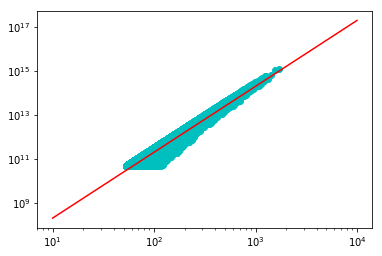

In [221]:
plt.scatter(table['halo_vmax'],table['halo_mvir'],c='c')
v = np.logspace(1,4,300)
plt.plot(v,(10**5.3)*v**(3.),c='r')
plt.xscale('log')
plt.yscale('log')

In [4]:
def find_Vmax(M):
    v = ((M)/(10**5.3))**(1/3.)
    return v
print(np.log10(find_Vmax(10**11.96)))
print(np.log10(find_Vmax(10**11.3)))
print(np.log10(find_Vmax(10**13.28)))
print(np.log10(find_Vmax(10**2.)))

2.22
2.0
2.6599999999999997
-1.0999999999999999


In [405]:
print(type(xi))

<class 'numpy.ndarray'>


In [7]:
5*(2.)**1/3

3.3333333333333335